# 1. 환경설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns



In [2]:
# 지수표현 없애기
pd.options.display.float_format = '{:.2f}'.format

# 2. 데이터 불러오기


In [3]:
hackle_device_path = 'dumps/hackle_csv/device_properties.csv'
hackle_events_path = 'dumps/hackle_csv/hackle_events.csv'
hackle_prop_path = 'dumps/hackle_csv/hackle_properties.csv'
hackle_user_path = 'dumps/hackle_csv/user_properties.csv'

In [4]:
raw_hackle_device = pd.read_csv(hackle_device_path)
raw_hackle_events = pd.read_csv(hackle_events_path)
raw_hackle_propeties = pd.read_csv(hackle_prop_path)
raw_hackle_user = pd.read_csv(hackle_user_path, dtype={0: str})

In [70]:
attendance_path = 'dumps/vote_csv/accounts_attendance.csv'
blockrecord_path = 'dumps/vote_csv/accounts_blockrecord.csv'
failpayment_path = 'dumps/vote_csv/accounts_failpaymenthistory.csv'
friendrequest_path = 'dumps/vote_csv/accounts_friendrequest.csv'
group_path = 'dumps/vote_csv/accounts_group.csv'
nearbyschool_path = 'dumps/vote_csv/accounts_nearbyschool.csv'
payment_path = 'dumps/vote_csv/accounts_paymenthistory.csv'
point_path = 'dumps/vote_csv/accounts_pointhistory.csv'
school_path = 'dumps/vote_csv/accounts_school.csv'
timeline_path = 'dumps/vote_csv/accounts_timelinereport.csv'
user_contacts_path = 'dumps/vote_csv/accounts_user_contacts.csv'
vote_user_path = 'dumps/vote_csv/accounts_user.csv'
user_question_path = 'dumps/vote_csv/accounts_userquestionrecord.csv'
userwithdraw_path = 'dumps/vote_csv/accounts_userwithdraw.csv'
vote_event_receipts_path = 'dumps/vote_csv/event_receipts.csv'
vote_events_path = 'dumps/vote_csv/events.csv'
polls_question_path = 'dumps/vote_csv/polls_question.csv'
polls_question_piece_path = 'dumps/vote_csv/polls_questionpiece.csv'
polls_question_report_path = 'dumps/vote_csv/polls_questionreport.csv'
polls_questionset_path = 'dumps/vote_csv/polls_questionset.csv'
polls_user_candidate_path = 'dumps/vote_csv/polls_usercandidate.csv'

In [71]:
raw_attendance = pd.read_csv(attendance_path)
raw_blockrecord = pd.read_csv(blockrecord_path)
raw_failpayment = pd.read_csv(failpayment_path)
raw_friendrequest = pd.read_csv(friendrequest_path)
raw_group = pd.read_csv(group_path)
raw_nearbyschool = pd.read_csv(nearbyschool_path)
payment_path = pd.read_csv(payment_path)
raw_point = pd.read_csv(point_path)
raw_school = pd.read_csv(school_path)
raw_timeline = pd.read_csv(timeline_path)
raw_user_contacts = pd.read_csv(user_contacts_path)
raw_vote_user = pd.read_csv(vote_user_path)
raw_user_question = pd.read_csv(user_question_path)
raw_userwithdraw = pd.read_csv(userwithdraw_path)
raw_vote_event_recipts = pd.read_csv(vote_event_receipts_path)
raw_vote_events = pd.read_csv(vote_events_path)
raw_polls_question = pd.read_csv(polls_question_path)
raw_polls_question_piece = pd.read_csv(polls_question_piece_path)
raw_polls_question_report = pd.read_csv(polls_question_report_path)
raw_polls_questionset = pd.read_csv(polls_questionset_path)
raw_polls_user = pd.read_csv(polls_user_candidate_path)

# 3. 데이터 확인

## 3-1. hackle table

### 3-1-1. 기기 설정

In [7]:
raw_hackle_device.head()

,id,device_id,device_model,device_vendor
0,1,000007C9-E103-4EB5-9777-A9084D4952DF,"iPhone14,7",Apple
1,2,00002245-458F-4CDD-8533-B448CD43DBD2,"iPhone14,7",Apple
2,3,00012620-313A-4502-9F8D-8DAB7443215B,"iPhone14,5",Apple
3,4,000137bc-80de-4bb5-b61d-df7f217a4501,SM-F711N,samsung
4,5,000227D6-B782-4367-91C4-486B76DF9E37,"iPhone12,3",Apple


In [8]:
# 결측치 없음
raw_hackle_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252380 entries, 0 to 252379
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             252380 non-null  int64 
 1   device_id      252380 non-null  object
 2   device_model   252380 non-null  object
 3   device_vendor  252380 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.7+ MB


In [9]:
# 전체중복값은 없음
raw_hackle_device.duplicated().sum()

np.int64(0)

In [10]:
# device_id 고유값이 다르다 = 중복값이 있다!
raw_hackle_device['device_id'].nunique()

251720

In [11]:
# device 중복행 660개
raw_hackle_device['device_id'].duplicated().sum()

np.int64(660)

In [12]:
# 기기가 바뀌었음. 모델은 상관 없으니까 keep=last로 남겨도 되나?
raw_hackle_device[raw_hackle_device['device_id'].duplicated(keep=False)].sort_values(by=['device_id', 'id']).head(10)

,id,device_id,device_model,device_vendor
16,17,0006bed8-512b-48f9-9b33-f79bb1e225a8,SM-A325N,samsung
17,18,0006bed8-512b-48f9-9b33-f79bb1e225a8,SM-S911N,samsung
704,705,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,SM-A546S,samsung
705,706,00bf3a4e-4ef9-4a6a-8558-cc5f68d4041d,SM-A716S,samsung
1718,1719,01BBBADC-073C-4AEC-8C00-52F0A29577B4,"iPhone12,8",Apple
1719,1720,01BBBADC-073C-4AEC-8C00-52F0A29577B4,"iPhone14,4",Apple
1824,1825,01D2DB25-5EF6-447C-B3FA-63156C4DCBCF,"iPhone12,1",Apple
1825,1826,01D2DB25-5EF6-447C-B3FA-63156C4DCBCF,"iPhone14,5",Apple
2134,2135,021fd2a9-a0e5-42e8-b9d1-0c2244101869,SM-A315N,samsung
2135,2136,021fd2a9-a0e5-42e8-b9d1-0c2244101869,SM-S918N,samsung


In [13]:
device_id_count = raw_hackle_device.groupby(by='device_id').agg(id_count=('id', 'count')).reset_index()
one_device_more_id = device_id_count['id_count'] > 1
print(f"device_id 최대 중복횟수 : {device_id_count[one_device_more_id]['id_count'].max()}회")
# 기기가 바뀐 이력은 최대 1번
# 그냥 keep=last 하면 될듯!

device_id 최대 중복횟수 : 2회


In [14]:
raw_hackle_device['device_model'].nunique()

522

### 3-1-2. 해클 속성


In [15]:
# hackle table merge
raw_hackle_merge = pd.merge(raw_hackle_propeties, raw_hackle_events, on='session_id')

In [16]:
raw_hackle_propeties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      443095 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB


In [17]:
raw_hackle_propeties.describe()

,id
count,525350.00
mean,262675.50
std,151655.63
min,1.00
25%,131338.25
50%,262675.50
75%,394012.75
max,525350.00


In [18]:
# 전체 중복행 없음
raw_hackle_propeties.duplicated().sum()

np.int64(0)

In [19]:
# 행은 50만개인데 session은 27만개
# 이게 이상해서 찾기 시작한건데 생각해보니까 당연함.. session 내에 이벤트로그마다 행이 찍혔을테니까..ㅋㅎㅋㅎ
raw_hackle_propeties['session_id'].duplicated().sum()

np.int64(271734)

In [20]:
# 다 똑같은데 왜 user_id가 두개지..? #id 282908, 518234
raw_hackle_propeties[raw_hackle_propeties['session_id'].duplicated(keep=False)].sort_values(by=['session_id', 'id']).head(10)

,id,session_id,user_id,language,osname,osversion,versionname,device_id
16284,16285,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160,ko-KR,iOS,16.5.1,2.0.5,00025EE1-BA46-4853-8FDD-B991FABA328F
284486,284487,00025EE1-BA46-4853-8FDD-B991FABA328F,1555160,ko-KR,iOS,16.5.1,2.0.3,00025EE1-BA46-4853-8FDD-B991FABA328F
136925,136926,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,1189864,ko-KR,iOS,16.5.1,2.0.5,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
429521,429522,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,BZulJkzkd5O2AfSkIzDXzJgPxbu2,ko-KR,iOS,16.5.1,2.0.5,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
485840,485841,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD,BZulJkzkd5O2AfSkIzDXzJgPxbu2,ko-KR,iOS,16.5.1,1.2.15,0004F43C-3A7A-4DE4-A02B-55AFDF07E9AD
282097,282098,00057831-A672-4163-9C02-AB920A371F2C,1548609,ko-KR,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C
518233,518234,00057831-A672-4163-9C02-AB920A371F2C,c5gLjsxgDkRXXlQlYQPH0CkosKf2,ko-KR,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C
94110,94111,000638C3-2BC2-4068-A482-861B526B2651,860893,ko-KR,iOS,16.5.1,2.0.5,000638C3-2BC2-4068-A482-861B526B2651
360177,360178,000638C3-2BC2-4068-A482-861B526B2651,NaN,ko-KR,iOS,16.5.1,2.0.5,000638C3-2BC2-4068-A482-861B526B2651
144444,144445,000C66B7-BD0A-4238-9560-A86E4A3A60A4,1457308,ko-KR,iOS,16.5.1,2.0.5,000C66B7-BD0A-4238-9560-A86E4A3A60A4


In [21]:
# 핸드폰도 안바꿨음 ..
raw_hackle_device[raw_hackle_device['device_id'] == '00057831-A672-4163-9C02-AB920A371F2C']

,id,device_id,device_model,device_vendor
12,13,00057831-A672-4163-9C02-AB920A371F2C,"iPhone14,2",Apple


In [22]:
# hackle event 안에서 서치..
userid_duplicated_in_merge = raw_hackle_merge[raw_hackle_merge['session_id'] == '00057831-A672-4163-9C02-AB920A371F2C']
userid_duplicated_in_merge.sort_values(by='event_datetime')[['event_datetime', 'user_id', 'osname', 'osversion', 'versionname', 'device_id', 'event_key', 'question_id']].head(30)

,event_datetime,user_id,osname,osversion,versionname,device_id,event_key,question_id
27133240,2023-07-26 09:47:49,c5gLjsxgDkRXXlQlYQPH0CkosKf2,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C,launch_app,NaN
27133247,2023-07-26 09:47:49,c5gLjsxgDkRXXlQlYQPH0CkosKf2,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C,$session_start,NaN
19246712,2023-07-26 09:47:49,1548609,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C,$session_start,NaN
19246703,2023-07-26 09:47:49,1548609,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C,$session_end,NaN
27133238,2023-07-26 09:47:49,c5gLjsxgDkRXXlQlYQPH0CkosKf2,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C,$session_end,NaN
19246705,2023-07-26 09:47:49,1548609,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C,launch_app,NaN
27133237,2023-07-26 09:47:51,c5gLjsxgDkRXXlQlYQPH0CkosKf2,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C,$session_start,NaN
19246702,2023-07-26 09:47:51,1548609,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C,$session_start,NaN
27133212,2023-07-26 09:47:58,c5gLjsxgDkRXXlQlYQPH0CkosKf2,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C,click_question_start,NaN
19246677,2023-07-26 09:47:58,1548609,iOS,16.1.2,2.0.5,00057831-A672-4163-9C02-AB920A371F2C,click_question_start,NaN


In [23]:
# 완전히 중복된 로그.. 아오
userid_duplicated_in_merge.groupby(by='user_id').agg(count=('event_key', 'count'))

,count
user_id,
1548609,44
c5gLjsxgDkRXXlQlYQPH0CkosKf2,44


In [24]:
# 행동에 이상은 없어보임
userid_duplicated_in_merge['event_key'].unique()

array(['click_question_start', '$session_end', 'skip_question',
       'launch_app', 'click_question_open', '$session_start',
       'view_lab_tap', 'complete_question', 'view_profile_tap',
       'view_timeline_tap', 'click_bottom_navigation_lab'], dtype=object)

- 미치겠네 urser_id 중복 상상도못한 정체; 이걸 어케찾지

In [25]:
# 하나의 session_id에 user_id가 2개 이상인 경우는 몇 건인지?
# 2만건은 잘못 계산했던거..
session_duplicated_user = raw_hackle_merge.groupby(by='session_id').agg(user_count=('user_id', 'nunique')).reset_index().sort_values(by='user_count', ascending=False)
sdu_cond1 = session_duplicated_user['user_count'] > 1
session_duplicated_user[sdu_cond1]

,session_id,user_count
1129,040914e1-61ac-40ef-b76a-718066d880dc,5
49056,755E96D9-A7A4-4E15-A688-759D7FB53963,3
3209,0CC53548-EB9A-4AE5-A72E-5D765B3BB1F9,3
217819,odyNAkJOgycJ8MTlmh2p5bOdOnX2,3
111386,JZWG739A2gVOXuDZwx8l3MEF9zN2,3
...,...,...
20124,2wp14t7q23a3wMGr9LWYXrnOR5j1,2
67352,9lnUOCzlcSNDivfwcV7SteUeKMg2,2
47246,6tmimgMhCJcdr6r5TyvJbj92I6J3,2
16762,2CNJkWUb8eazVlSAl5q8hPqCYY62,2


In [26]:
# 한 session에 user_id가 5개?
userid_duplicated_in_merge = raw_hackle_merge[raw_hackle_merge['session_id'] == '040914e1-61ac-40ef-b76a-718066d880dc']
userid_duplicated_in_merge.sort_values(by='event_datetime')[['event_datetime', 'user_id', 'osname', 'osversion', 'versionname', 'device_id', 'event_key']].head(30)

,event_datetime,user_id,osname,osversion,versionname,device_id,event_key
18142573,2023-07-21 02:33:30,1577954,Android,13,2.0.3,040914e1-61ac-40ef-b76a-718066d880dc,launch_app
2243193,2023-07-21 02:33:30,1577938,Android,13,2.0.3,040914e1-61ac-40ef-b76a-718066d880dc,launch_app
18142714,2023-07-21 02:33:30,1577954,Android,13,2.0.3,040914e1-61ac-40ef-b76a-718066d880dc,$session_start
20384297,2023-07-21 02:33:30,849763,Android,13,2.0.3,040914e1-61ac-40ef-b76a-718066d880dc,$session_start
7699023,2023-07-21 02:33:30,1577938,Android,13,2.0.5,040914e1-61ac-40ef-b76a-718066d880dc,launch_app
18378080,2023-07-21 02:33:30,NaN,Android,13,2.0.3,040914e1-61ac-40ef-b76a-718066d880dc,launch_app
3616475,2023-07-21 02:33:30,1577954,Android,13,2.0.5,040914e1-61ac-40ef-b76a-718066d880dc,launch_app
11233617,2023-07-21 02:33:30,NaN,Android,13,2.0.5,040914e1-61ac-40ef-b76a-718066d880dc,$session_start
11233476,2023-07-21 02:33:30,NaN,Android,13,2.0.5,040914e1-61ac-40ef-b76a-718066d880dc,launch_app
15080493,2023-07-21 02:33:30,1577930,Android,13,2.0.3,040914e1-61ac-40ef-b76a-718066d880dc,launch_app


In [27]:
userid_duplicated_in_merge.groupby(by='user_id').agg(count=('event_key', 'count'))

,count
user_id,
1577930,568
1577938,1136
1577954,1136
838541,568
849763,568


- 같은 로그가 버전별로(2.0.3, 2.0.5) 남기도 하고, 결측치로 남기도 하고..난리브루스네
- 이러면 hackle_events에서 결측치가 비회원일거라는 보장도 없음
- android랑 ios의 차이도 있나?

In [28]:
# 한 session_id에서 여러개의 user_id가 있는 중복 로그로 추정되는 로그들의 기기는 ios가 더 많았다.
session_duplicated_user_list = session_duplicated_user[sdu_cond1]['session_id'].unique()
filtered_session_duplicated_user = raw_hackle_merge[raw_hackle_merge['session_id'].isin(session_duplicated_user_list)]
session_os_info = filtered_session_duplicated_user.drop_duplicates('session_id', keep='last')
session_os_info['osname'].value_counts()

osname
iOS        58792
Android    29001
Name: count, dtype: int64

In [29]:
# 그럼 앱 버전은?
# ['versionname'].value_counts()
# 이건.. 모르겠네요 ..

- user_id를 하나만 남기는 방법이 뭐가 있을까
- 한 session_id 내에서 device_id를 기준으로 event_key가 가장 많이 찍힌 user_id만 남긴다?

In [30]:
# 내부데이터 중 유저아이디랑 비교
print(f"내부데이터 유저아이디 행: {len(raw_vote_user)}")
print(f"내부데이터 유저아이디 고유값: {raw_vote_user['id'].nunique()}")

내부데이터 유저아이디 행: 677085
내부데이터 유저아이디 고유값: 677085


In [31]:
raw_vote_user.duplicated().sum()

np.int64(0)

In [32]:
raw_vote_user.describe()

,id,is_superuser,is_staff,point,is_push_on,report_count,alarm_count,pending_chat,pending_votes,group_id
count,677085.00,677085.00,677085.00,677085.00,677085.00,677085.00,677085.00,677085.00,677085.00,677082.00
mean,1212969.13,0.00,0.00,3039.14,0.84,0.04,0.95,0.10,84.63,37022.98
std,213897.05,0.00,0.00,1076019.94,0.36,0.59,56.11,11.09,123.26,21997.77
min,831956.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,1.00
25%,1028075.00,0.00,0.00,400.00,1.00,0.00,0.00,0.00,2.00,18488.00
50%,1211729.00,0.00,0.00,965.00,1.00,0.00,1.00,0.00,29.00,35614.00
75%,1397906.00,0.00,0.00,2183.00,1.00,0.00,1.00,0.00,122.00,54534.00
max,1583733.00,1.00,1.00,885000006.00,1.00,253.00,40878.00,5712.00,3352.00,84546.00


In [33]:
raw_vote_user['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 677085 entries, 0 to 677084
Series name: id
Non-Null Count   Dtype
--------------   -----
677085 non-null  int64
dtypes: int64(1)
memory usage: 5.2 MB


In [34]:
raw_vote_user['id'] = raw_vote_user['id'].astype(str)

In [35]:
raw_vote_user['id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 677085 entries, 0 to 677084
Series name: id
Non-Null Count   Dtype 
--------------   ----- 
677085 non-null  object
dtypes: object(1)
memory usage: 5.2+ MB


In [36]:
# 내부데이터의 user list 추출해서 hackle event에 필터링
vote_user_list = raw_vote_user['id'].unique()
duple_user_condition = raw_hackle_merge['user_id'].isin(vote_user_list)
filtered_hackle_merge = raw_hackle_merge[duple_user_condition] # 필터링된 hackle 속성&이벤트 merge dataframe
print(f"내부데이터로 필터링된 hackle 이벤트 유저아이디 고유값: {filtered_hackle_merge['user_id'].nunique()}")

내부데이터로 필터링된 hackle 이벤트 유저아이디 고유값: 226365


In [37]:
filtered_hackle_merge.head()

,id_x,session_id,user_id,language,osname,osversion,versionname,device_id,event_id,event_datetime,event_key,id_y,item_name,page_name,friend_count,votes_count,heart_balance,question_id
61,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,00000716-27e9-4e72-a602-d0ce61784b06,NaN,NaN,64.00,436.00,4830.00,NaN
62,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279,0294d883-0e06-415c-b970-5e8ee2517b60,2023-07-18 21:01:38,$session_start,0294d883-0e06-415c-b970-5e8ee2517b60,NaN,NaN,NaN,NaN,NaN,NaN
63,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279,0acb0eb0-3bc9-48b9-a166-080888572fc6,2023-07-18 21:17:44,view_lab_tap,0acb0eb0-3bc9-48b9-a166-080888572fc6,NaN,NaN,64.00,436.00,4830.00,NaN
64,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279,0cf6ba3e-9bc1-4919-8c2e-904c475d0fb7,2023-07-18 21:04:50,click_bottom_navigation_questions,0cf6ba3e-9bc1-4919-8c2e-904c475d0fb7,NaN,NaN,64.00,436.00,4830.00,NaN
65,2,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,1046711,ko-KR,iOS,16.5.1,2.0.3,D5417226-F71B-4A9E-A180-CD072F2AB279,0e1e65e3-f314-4298-9946-59497cf028cb,2023-07-18 21:07:48,click_question_share,0e1e65e3-f314-4298-9946-59497cf028cb,NaN,NaN,64.00,436.00,4830.00,NaN


In [38]:
filtered_session_duplicated_user = filtered_hackle_merge.groupby(by='session_id').agg(user_count=('user_id', 'nunique')).reset_index().sort_values(by='user_count', ascending=False)
filtered_sdu_cond1 = filtered_session_duplicated_user['user_count'] > 1
filtered_hackle_merge_duplicated_user = filtered_session_duplicated_user[filtered_sdu_cond1]
print(f"필터링된 해클 이벤트에서 한 세션당 여러개의 유저아이디를 가진 세션 개수: {len(filtered_hackle_merge_duplicated_user)}")

필터링된 해클 이벤트에서 한 세션당 여러개의 유저아이디를 가진 세션 개수: 52


In [39]:
filtered_hackle_merge_duplicated_user.head(10)
# 가장 많았던 5건은 그대로 있음. 동시로그가 많이 찍혔던거라 에러가 맞음!

,session_id,user_count
947,040914e1-61ac-40ef-b76a-718066d880dc,5
65740,B941F9F9-CF53-4DAE-A204-75E666B5D277,3
49226,87046FBA-B84B-4124-ADE9-EA03DF95E7B8,2
123374,SDCe4wZnO9eBy8aQ1SxAHAIlg7f2,2
12243,21ef715c-d365-405b-a5ad-cdba4fc79ff3,2
168026,fCosjVWfPnZGBGbgUt4Q4QMLVnx1,2
40200,6c7a7b9d-6893-4538-a677-2888eadd629a,2
79991,E9283357-DCCC-4DFD-8CC7-7A67ABEBF0E0,2
98413,JZWG739A2gVOXuDZwx8l3MEF9zN2,2
196346,ooZNiceIljc8cstryHqkmDm8oYi1,2


In [40]:
# 한 session_id에 user_id 3개 기록된 내용
userid_duplicated_in_merge = filtered_hackle_merge[filtered_hackle_merge['session_id'] == 'B941F9F9-CF53-4DAE-A204-75E666B5D277']
userid_duplicated_in_merge.sort_values(by='event_datetime')[['event_datetime', 'user_id', 'osname', 'osversion', 'versionname', 'device_id', 'event_key']].head(30)

,event_datetime,user_id,osname,osversion,versionname,device_id,event_key
9773484,2023-07-19 00:34:07,1579831,iOS,16.6,2.0.5,B941F9F9-CF53-4DAE-A204-75E666B5D277,$session_start
6145257,2023-07-19 00:34:07,1579057,iOS,16.6,2.0.3,B941F9F9-CF53-4DAE-A204-75E666B5D277,$session_start
47671,2023-07-19 00:34:07,947584,iOS,16.6,2.0.5,B941F9F9-CF53-4DAE-A204-75E666B5D277,$session_start
6449331,2023-07-19 00:34:07,947584,iOS,16.6,2.0.3,B941F9F9-CF53-4DAE-A204-75E666B5D277,$session_start
6450121,2023-07-19 00:34:24,947584,iOS,16.6,2.0.3,B941F9F9-CF53-4DAE-A204-75E666B5D277,view_signup
6146047,2023-07-19 00:34:24,1579057,iOS,16.6,2.0.3,B941F9F9-CF53-4DAE-A204-75E666B5D277,view_signup
48461,2023-07-19 00:34:24,947584,iOS,16.6,2.0.5,B941F9F9-CF53-4DAE-A204-75E666B5D277,view_signup
9774274,2023-07-19 00:34:24,1579831,iOS,16.6,2.0.5,B941F9F9-CF53-4DAE-A204-75E666B5D277,view_signup
6450060,2023-07-19 00:34:28,947584,iOS,16.6,2.0.3,B941F9F9-CF53-4DAE-A204-75E666B5D277,view_signup
9774213,2023-07-19 00:34:28,1579831,iOS,16.6,2.0.5,B941F9F9-CF53-4DAE-A204-75E666B5D277,view_signup


In [41]:
userid_duplicated_in_merge.groupby(by='user_id').agg(count=('event_key', 'count'))

,count
user_id,
1579057,1997
1579831,1997
947584,3994


- 하나의 세션에 여러개의 유저아이디가 기록된건 대부분 에러인 것으로 추정.
- 내부데이터에도 중복기재된 아이디이기때문에 이 아이디 목록은 내부데이터에서도 삭제할 필요 있음

In [42]:
# vote table user list로 필터링 & 중복 오류 포함된 session_id 제거한 hackle_merge dataframe 생성(= 전처리)
error_session_list = filtered_hackle_merge_duplicated_user['session_id'].unique()
processed_hackle_merge = filtered_hackle_merge[~filtered_hackle_merge['session_id'].isin(error_session_list)].reset_index(drop=True)

In [43]:
print(f"1️⃣ raw data version count\
      \n {raw_hackle_merge['versionname'].value_counts()}")
print('-' * 10)

1️⃣ raw data version count      
 versionname
2.0.5     15826267
2.0.3      8874886
2.0.0      2056862
1.2.15      245864
1.2.16      241316
1.2.19       79113
1.2.10        7107
1.2.8         1361
2.0.4          333
1.0.0           43
1.2.1           10
1.2.3           10
1.2.4            5
1.2.9            4
1.2.5            3
2.0.2            2
Name: count, dtype: int64
----------


In [44]:
print(f"2️⃣ filtered version count\
      \n {filtered_hackle_merge['versionname'].value_counts()}")
print('-' * 10)
print(f"3️⃣ processed version count\
      \n {processed_hackle_merge['versionname'].value_counts()}")

2️⃣ filtered version count      
 versionname
2.0.5     12022792
2.0.3      6593344
2.0.0      1497055
1.2.19       45604
1.2.8           60
Name: count, dtype: int64
----------
3️⃣ processed version count      
 versionname
2.0.5     11999841
2.0.3      6579701
2.0.0      1496457
1.2.19       45604
1.2.8           60
Name: count, dtype: int64


### 3-1-3. 해클 이벤트

In [45]:
raw_hackle_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   event_id        object 
 1   event_datetime  object 
 2   event_key       object 
 3   session_id      object 
 4   id              object 
 5   item_name       object 
 6   page_name       object 
 7   friend_count    float64
 8   votes_count     float64
 9   heart_balance   float64
 10  question_id     float64
dtypes: float64(4), object(7)
memory usage: 960.2+ MB


In [46]:
raw_hackle_events.head()

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,NaN,NaN,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,NaN,NaN,64.00,436.00,4830.00,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,NaN,NaN,26.00,174.00,4729.00,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,NaN,NaN,61.00,44.00,142.00,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,NaN,NaN,119.00,545.00,3287.00,NaN


## 3-2. vote table

- hackle_event에서 이상치가 컸던 heart_balance의 확인을 위해 vote_table의 구매이력 확인
- 오류 방지를 위해 위에서 계산한 user_id filter 먼저 수행

### 3-2-1. 유저

In [ ]:
# hackle에서 삭제한 session_id에 해당하는 user_id 제거
duplicated_session_list = filtered_hackle_merge_duplicated_user['session_id'].unique()


### 3-2-2. 유저 컨택

In [72]:
raw_user_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   contacts_count       5063 non-null   int64 
 2   invite_user_id_list  5063 non-null   object
 3   user_id              5063 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 158.3+ KB


In [73]:
raw_user_contacts.head()

,id,contacts_count,invite_user_id_list,user_id
0,259,30,[],1167696
1,1756,79,[],863169
2,13742,21,[854615],857205
3,13754,29,[],851431
4,13756,28,[849318],855476


In [74]:
raw_user_contacts.describe()

,id,contacts_count,user_id
count,5063.00,5063.00,5063.00
mean,2840906.79,25.99,1114789.07
std,2895428.21,13.60,218770.17
min,259.00,0.00,847375.00
25%,747597.00,16.00,885515.50
50%,1580135.00,24.00,1119987.00
75%,4201597.50,34.00,1278826.00
max,14608267.00,114.00,1583629.00


In [97]:
raw_user_contacts.isna().sum()

id                     0
contacts_count         0
invite_user_id_list    0
user_id                0
inviter_count          0
dtype: int64

In [ ]:
# 이 전화번호를 초대했던 유저 아이디 고유값
# 928명이 초대를 했었다?
raw_user_contacts['invite_user_id_list'].nunique()

928

In [ ]:
raw_user_contacts['invite_user_id_list'].explode().nunique()

- list 안에 있는 객체들을 nunique로 셀 수 있는건가? -> 아님! 셀 수 없음! 하나의 리스트를 통으로 구분!
- explode()로 객체들을 끊어서 구분 할 수 있게 만들고 unique를 집계해야함
- 둘 다 928로 값이 똑같음? info에 문자열로 기재되어있으면 리스트인척 하는 문자열인건가?

In [76]:
print(type(raw_user_contacts['invite_user_id_list'].iloc[2])) 

<class 'str'>


In [ ]:
# 리스트 같은 모양으로 구성된 문자열을 진짜 리스트로 변환
# 파이썬 내장 라이브러리 ast.literal_eval
# 문자열로 된 파이썬 구조(리스트, 딕셔너리 등)를 실제 객체로 변환해줌!
# 제미나이 굿~

import ast
def convert_to_list(x):
    try:
        if pd.isna(x) or x == "": return []
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

raw_user_contacts['invite_user_id_list'] = raw_user_contacts['invite_user_id_list'].apply(convert_to_list)

# 형변환 확인용 코드
print(type(raw_user_contacts['invite_user_id_list'].iloc[2])) 

<class 'list'>


In [ ]:
# info에서는 똑같이 object라고 나옴. type으로 세부확인이 꼭 필요할듯!
raw_user_contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   5063 non-null   int64 
 1   contacts_count       5063 non-null   int64 
 2   invite_user_id_list  5063 non-null   object
 3   user_id              5063 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 158.3+ KB


In [79]:
raw_user_contacts['invite_user_id_list'].explode().nunique()

1122

- 이제 제대로 구분됨. 초대를 했던 유저는 1122명

In [89]:
# 초대를 가장 많이 보낸 유저
raw_user_contacts['invite_user_id_list'].explode().dropna().value_counts().head(5)

invite_user_id_list
1154585    21
1233225    17
883602     16
1041381    14
873001     14
Name: count, dtype: int64

In [90]:
# 유저별로 나를 초대한 사람이 몇 명인지 계산
raw_user_contacts['inviter_count'] = raw_user_contacts['invite_user_id_list'].map(len)

# 가장 많은 '초대자'를 보유한(가장 많이 초대된) 유저 확인
raw_user_contacts.sort_values(by='inviter_count', ascending=False).head(5)

,id,contacts_count,invite_user_id_list,user_id,inviter_count
1009,593562,62,"[1050526, 1050496, 1167888, 1185543, 1186531, ...",1207606,10
2141,1318688,37,"[873001, 883602, 883491, 883737, 885050, 88350...",932308,9
3340,2889775,54,"[931759, 1047310, 984540, 1082102, 1099436, 10...",1122686,7
1359,815984,56,"[874152, 875879, 876859, 878500, 878464, 880550]",881627,6
3012,2413486,73,"[943542, 954342, 927655, 918689, 919011, 915668]",1008546,6


In [ ]:
# 초대수는 거의 0에 가까움
raw_user_contacts['inviter_count'].describe()

count   5063.00
mean       0.33
std        0.75
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       10.00
Name: inviter_count, dtype: float64

In [213]:
# 그럼 초대를 받은 사람들의 분포는?
# 전체 5000명 중 초대를 받은 유저는 1158명, 약 20%
inviter_codition = raw_user_contacts['inviter_count'] > 0
invited_user = raw_user_contacts[inviter_codition]
invited_user

,id,contacts_count,invite_user_id_list,user_id,inviter_count
2,13742,21,[854615],857205,1
4,13756,28,[849318],855476,1
5,13784,31,[855829],1482744,1
6,13798,45,"[849318, 849421]",854615,2
8,13815,26,"[855626, 856042, 837947]",858674,3
...,...,...,...,...,...
5014,12005454,19,[1457472],1460093,1
5029,12156801,19,[1417159],1426631,1
5044,12220468,11,[1461877],1473020,1
5045,12220480,8,[1427239],1481428,1


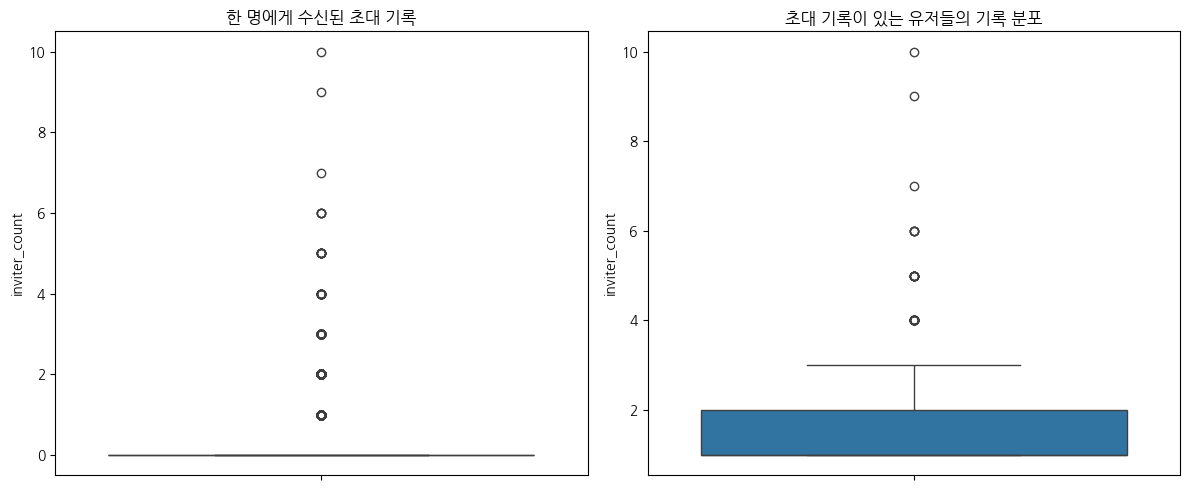

In [214]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.boxplot(
    data=raw_user_contacts['inviter_count'], 
    ax=axes[0]
)
axes[0].set_title('한 명에게 수신된 초대 기록')

sns.boxplot(
    data=invited_user['inviter_count'],
    ax=axes[1]
)
axes[1].set_title('초대 기록이 있는 유저들의 기록 분포')

plt.tight_layout()
plt.show()

In [ ]:
# user_id 중복값 없음!
raw_user_contacts['user_id'].nunique()

5063

In [ ]:
# contacts_count 유저 아이디의 전화번호를 가지고 있는 유저 수
# 요즘은 인스타로 연락하는 경우가 많다보니 아예 없는것도 그렇게 이상한 수치는 아니라고 생각
raw_user_contacts['contacts_count'].describe()

count   5063.00
mean      25.99
std       13.60
min        0.00
25%       16.00
50%       24.00
75%       34.00
max      114.00
Name: contacts_count, dtype: float64

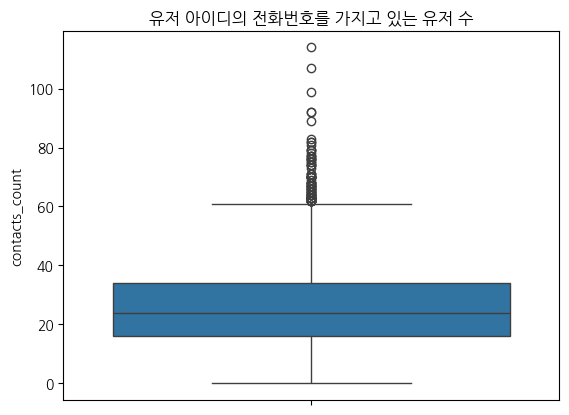

In [215]:
plt.figure()
sns.boxplot(
    data = raw_user_contacts['contacts_count']
)
plt.title('유저 아이디의 전화번호를 가지고 있는 유저 수')
plt.show()

### 3-2-3. 포인트 기록


In [217]:
# raw_point = pd.read_csv(point_path)

In [218]:
raw_point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 5 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id                       int64  
 1   delta_point              int64  
 2   created_at               object 
 3   user_id                  int64  
 4   user_question_record_id  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 89.2+ MB


In [219]:
raw_point.isna().sum()

id                            0
delta_point                   0
created_at                    0
user_id                       0
user_question_record_id    2992
dtype: int64

In [220]:
raw_point.describe()

,id,delta_point,user_id,user_question_record_id
count,2338918.00,2338918.00,2338918.00,2335926.00
mean,126536375.31,0.86,1111554.42,61418034.60
std,96109918.36,58.86,202442.94,45319697.06
min,790629.00,-1000.00,838023.00,771777.00
25%,41125051.25,7.00,886189.00,20885605.50
50%,112397137.50,10.00,1126012.00,55406136.00
75%,198205120.50,13.00,1260221.00,95558554.00
max,340672375.00,1000.00,1583358.00,161666464.00


In [221]:
raw_point.head()

,id,delta_point,created_at,user_id,user_question_record_id
0,790629,9,2023-04-28 12:27:49,849436,771777.00
1,790652,9,2023-04-28 12:28:02,849436,771800.00
2,790664,5,2023-04-28 12:28:09,849436,771812.00
3,790680,13,2023-04-28 12:28:16,849436,771828.00
4,790703,5,2023-04-28 12:28:26,849436,771851.00


In [222]:
# 전처리
raw_point['created_at'] = pd.to_datetime(raw_point['created_at']).dt.floor('s') # 시간컬럼 변환
raw_point.drop(columns='id', inplace=True) # id컬럼 삭제

In [223]:
raw_point['user_question_record_id'] = raw_point['user_question_record_id'].astype('Int64').astype(str)
# 문자형으로 변환해도 자꾸 소수점이 있는 모양으로 저장됨. 판다스전용 정수형 Int64로 변환하여 소수점 삭제

In [224]:
raw_point.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338918 entries, 0 to 2338917
Data columns (total 4 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   delta_point              int64         
 1   created_at               datetime64[ns]
 2   user_id                  int64         
 3   user_question_record_id  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 71.4+ MB


In [ ]:
# 이 테이블의 기록은 230428 ~ 230508 약 10일
raw_point.describe()


,delta_point,created_at,user_id
count,2338918.00,2338918,2338918.00
mean,0.86,2023-05-18 03:06:43.825683968,1111554.42
min,-1000.00,2023-04-28 12:27:49,838023.00
25%,7.00,2023-05-11 04:37:02,886189.00
50%,10.00,2023-05-16 07:29:11,1126012.00
75%,13.00,2023-05-22 13:47:48.750000128,1260221.00
max,1000.00,2024-05-08 01:36:18,1583358.00
std,58.86,NaN,202442.94


In [225]:
raw_point = raw_point.sort_values(by='created_at')
raw_point

,delta_point,created_at,user_id,user_question_record_id
0,9,2023-04-28 12:27:49,849436,771777
1,9,2023-04-28 12:28:02,849436,771800
2,5,2023-04-28 12:28:09,849436,771812
3,13,2023-04-28 12:28:16,849436,771828
4,5,2023-04-28 12:28:26,849436,771851
...,...,...,...,...
2338913,14,2024-05-08 01:35:02,855509,161666462
2338914,11,2024-05-08 01:36:00,855525,161666463
2338915,11,2024-05-08 01:36:00,855526,161666463
2338916,12,2024-05-08 01:36:18,855525,161666464


In [226]:
# 전체 중복값
raw_point[raw_point.duplicated()]

,delta_point,created_at,user_id,user_question_record_id
854314,5,2023-05-13 16:26:32,1198097,38953394
859533,9,2023-05-13 17:21:17,1234279,39197466
859737,13,2023-05-13 17:22:53,1234279,39202746
860794,10,2023-05-13 17:43:34,1212889,39257259
860846,8,2023-05-13 17:44:36,1212889,39259026
...,...,...,...,...
2334538,200,2023-09-25 14:24:09,878307,<NA>
2336269,777,2023-11-05 15:27:00,1040133,<NA>
2337868,200,2024-01-06 14:21:47,875314,<NA>
2337872,200,2024-01-06 14:23:09,875314,<NA>


In [227]:
# 전부 중복되는 내용은 일단 드롭
# 이 테이블의 정확한 집계를 위해서 일단 여기서만 드롭함!
raw_point.drop_duplicates(keep='last')

,delta_point,created_at,user_id,user_question_record_id
0,9,2023-04-28 12:27:49,849436,771777
1,9,2023-04-28 12:28:02,849436,771800
2,5,2023-04-28 12:28:09,849436,771812
3,13,2023-04-28 12:28:16,849436,771828
4,5,2023-04-28 12:28:26,849436,771851
...,...,...,...,...
2338913,14,2024-05-08 01:35:02,855509,161666462
2338914,11,2024-05-08 01:36:00,855525,161666463
2338915,11,2024-05-08 01:36:00,855526,161666463
2338916,12,2024-05-08 01:36:18,855525,161666464


In [228]:
raw_point['user_question_record_id'].value_counts()

user_question_record_id
<NA>         2992
113604578       6
119688296       6
120263789       6
108358591       6
             ... 
124145015       1
6267348         1
33518477        1
124145437       1
771777          1
Name: count, Length: 1217555, dtype: int64

In [229]:
# 위에서 str로 형변환한것 때문에 결측치까지 문자열로 바뀌어버림.
# 바뀐 문자열 다시 결측치로 변환
raw_point['user_question_record_id'] = raw_point['user_question_record_id'].replace('<NA>', np.nan)

In [230]:
raw_point['user_question_record_id'].isna().sum()

np.int64(2992)

In [231]:
# 질문아이디 없이 기록된 포인트
# 구매로 인한 내역인가? 아니면 포인트 이벤트? 이것도 다른 테이블이랑 merge해봐야 알 수 있을듯.
no_question_point = raw_point[raw_point['user_question_record_id'].isna()]
no_question_point['delta_point'].value_counts()

delta_point
 200     1372
 500      429
 50       322
 1000     233
 300      180
 210      127
 220       64
 60        47
 230       36
 240       26
 777       21
 250       20
 70        16
 260       14
 270       12
 80        10
 100       10
 280       10
 90         7
 110        6
 120        6
 130        5
 140        4
 150        4
 160        4
 170        3
 180        3
-30         1
Name: count, dtype: int64

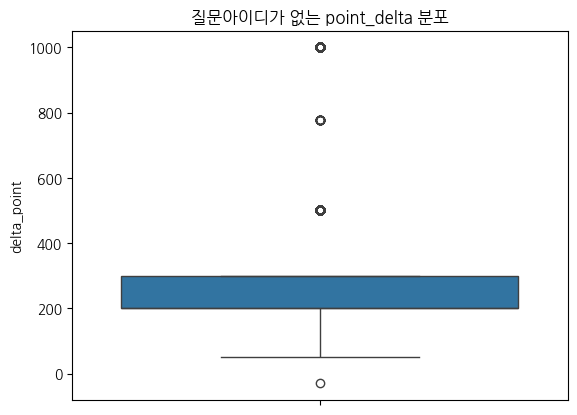

In [232]:
plt.figure()
sns.boxplot(
    data = no_question_point['delta_point']
)
plt.title('질문아이디가 없는 point_delta 분포')
plt.show()

In [233]:
raw_hackle_events['item_name'].unique()

array([nan, '777 하트', '무료충전소', '1000 하트', '200 하트', '4000 하트'],
      dtype=object)

In [234]:
point_negative_condition = raw_point['delta_point'] < 0
raw_point[point_negative_condition]['delta_point'].describe()

count   108583.00
mean      -194.61
std        174.48
min      -1000.00
25%       -300.00
50%       -200.00
75%        -10.00
max        -10.00
Name: delta_point, dtype: float64

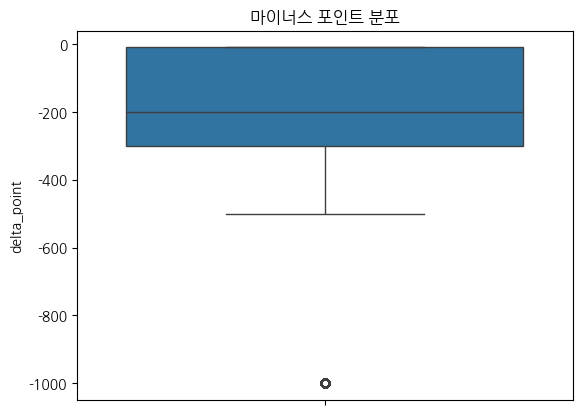

In [ ]:
plt.figure()
sns.boxplot(
    data = raw_point[point_negative_condition]['delta_point']
)
plt.title('마이너스 포인트 분포')
plt.show()

# 마이너스 포인트는 잘못 지급된 포인트를 정정하기 위함이었을까?

### 3-2-4. 학교

In [177]:
raw_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5951 entries, 0 to 5950
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5951 non-null   int64 
 1   address        5951 non-null   object
 2   student_count  5951 non-null   int64 
 3   school_type    5951 non-null   object
dtypes: int64(2), object(2)
memory usage: 186.1+ KB


In [147]:
raw_school.describe()

,id,student_count
count,5951.00,5951.00
mean,2981.03,113.77
std,1719.08,102.86
min,4.00,0.00
25%,1493.50,16.00
50%,2981.00,97.00
75%,4469.50,183.00
max,5965.00,578.00


In [149]:
raw_school.isna().sum()

id               0
address          0
student_count    0
school_type      0
dtype: int64

In [148]:
raw_school.head()

,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,5,충청북도 충주시,160,M
2,6,충청북도 충주시,200,H
3,7,충청북도 충주시,114,H
4,8,충청북도 충주시,139,M


In [ ]:
# 학교 주소가 제각각인듯
raw_school['address'].value_counts()

address
경기도 화성시         78
경기도 부천시         60
경상남도 김해시        58
경기도 남양주시        58
대구광역시 달서구       56
                ..
대한민국 강원도 철원군     1
서울 노원구           1
서울 마포구           1
경기 용인시 수지구       1
경북 김천시           1
Name: count, Length: 278, dtype: int64

In [ ]:
# 2026년 1월 기준 대한민국의 시·군·구 기초자치단체는 총 226개
# 비슷한 이름이 중복되었을 수 있음
# 위에서 서울 노원구 1건, 아래 Unique list 중 서울특별시 노원구 존재 -> 이런 식으로 중복됐을 가능성 아아아주 높음~
print(f"주소지 고유값 : {raw_school['address'].nunique()}")
print(f"{raw_school['address'].unique()}")

주소지 고유값 : 278
['충청북도 충주시' '충청북도 청주시 흥덕구' '충청북도 청주시 청원구' '충청북도 청주시 서원구' '충청북도 청주시 상당구'
 '충청북도 진천군' '충청북도 증평군' '충청북도 제천시' '충청북도 음성군' '충청북도 옥천군' '충청북도 영동군'
 '충청북도 보은군' '충청북도 단양군' '충청북도 괴산군' '충청남도 홍성군' '충청남도 태안군' '충청남도 청양군'
 '충청남도 천안시 서북구' '충청남도 천안시 동남구' '충청남도 예산군' '충청남도 아산시' '충청남도 서천군' '충청남도 서산시'
 '충청남도 부여군' '충청남도 보령시' '충청남도 당진시' '충청남도 논산시' '충청남도 금산군' '충청남도 공주시'
 '충청남도 계룡시' '제주특별자치도 제주시' '제주특별자치도 서귀포시' '전북 정읍시' '전라북도 진안군' '전라북도 정읍시'
 '전라북도 전주시 완산구' '전라북도 전주시 덕진구' '전라북도 장수군' '전라북도 임실군' '전라북도 익산시' '전라북도 완주군'
 '전라북도 순창군' '전라북도 부안군' '전라북도 무주군' '전라북도 남원시' '전라북도 김제시' '전라북도 군산시'
 '전라북도 고창군' '전라남도 화순군' '전라남도 해남군' '전라남도 함평군' '전라남도 진도군' '전라남도 장흥군'
 '전라남도 장성군' '전라남도 완도군' '전라남도 영암군' '전라남도 영광군' '전라남도 여수시' '전라남도 신안군'
 '전라남도 순천시' '전라남도 보성군' '전라남도 무안군' '전라남도 목포시' '전라남도 담양군' '전라남도 나주시'
 '전라남도 구례군' '전라남도 광양시' '전라남도 곡성군' '전라남도 고흥군' '전라남도 강진군' '인천광역시 중구'
 '인천광역시 옹진군' '인천광역시 연수구' '인천광역시 서구' '인천광역시 부평구' '인천광역시 미추홀구' '인천광역시 동구'
 '인천광역시 남동구' '인천광역시 계양구' '인천광역시 강화군' '인천 남동구' '울산광역시 중구' '울산광역시 울주군'
 '울산광역시 북구' '울산

In [ ]:
# 학생 수 분포
